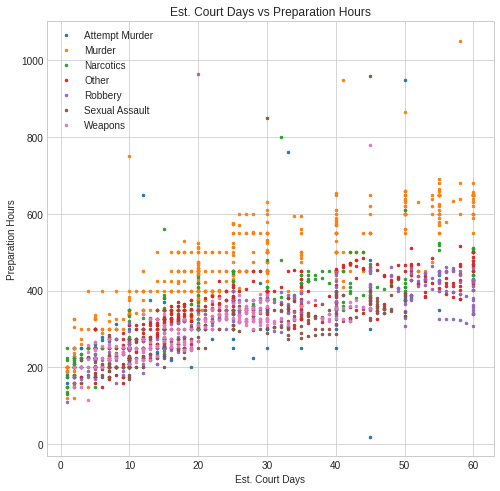

Observation: 
 1 - I see a curve pattern here 
 2 - at least for some of the charges such as "Murder" we see a different population


In [97]:
# plot all the charges in one scatter plot
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np    

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')
court_prep.head()
    
# plot all the charges in one scatter plot
df = pd.DataFrame(dict(x = court_prep['court_d'],
                       y = court_prep['prep_h'],
                       label = court_prep['charge']))
groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    fig.set_size_inches(8, 8)
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=5, label=name)
    ax.legend()
    ax.set_title('Est. Court Days vs Preparation Hours')
    ax.set_xlabel('Est. Court Days')
    ax.set_ylabel('Preparation Hours')
plt.show()

fig.savefig('all_together scatter.jpg')

print("Observation: \n 1 - I see a curve pattern here \n 2 - at least for some of the charges such as \"Murder\" we see a different population")


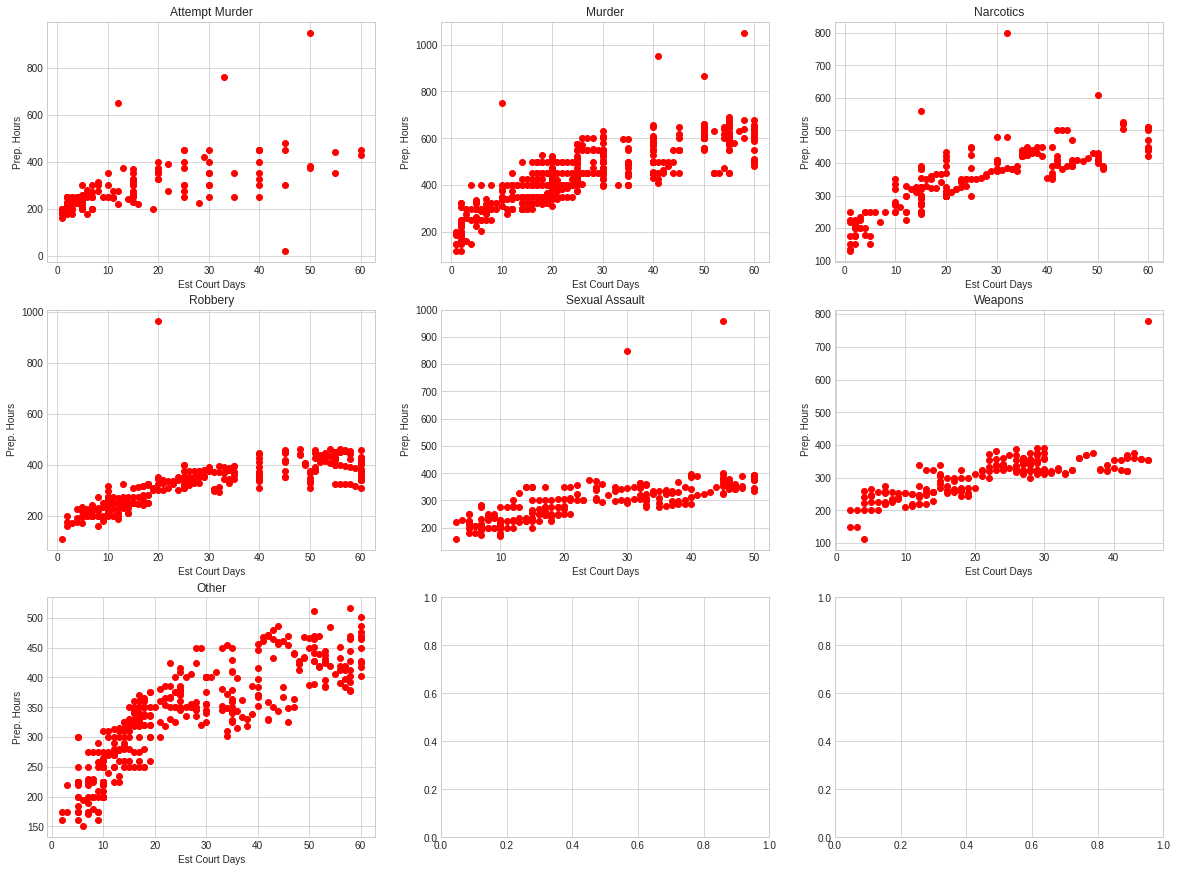

Observation:
 1 - I see a cruve pattern in almost all of the charges 
 2 - there are some outliers


In [98]:
# to graph all the charges next to gether (matrix fromat)


import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')
court_prep.head()

df = pd.DataFrame(dict(x = court_prep['court_d'],
               y = court_prep['prep_h'],
               label = court_prep['charge']))



df1 = df[['x','y','label']].loc[df.label == 'Attempt Murder']
df2 = df[['x','y','label']].loc[df.label == 'Murder']
df3 = df[['x','y','label']].loc[df.label == 'Narcotics']
df4 = df[['x','y','label']].loc[df.label == 'Robbery']
df5 = df[['x','y','label']].loc[df.label == 'Sexual Assault']
df6 = df[['x','y','label']].loc[df.label == 'Weapons']
df7 = df[['x','y','label']].loc[df.label == 'Other']


#fig.tight_layout(pad=9)


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 15))

ax1.scatter(df1['x'],df1['y'], c = 'red')
ax2.scatter(df2['x'],df2['y'], c = 'red')
ax3.scatter(df3['x'],df3['y'], c = 'red')
ax4.scatter(df4['x'],df4['y'], c = 'red')
ax5.scatter(df5['x'],df5['y'], c = 'red')
ax6.scatter(df6['x'],df6['y'], c = 'red')
ax7.scatter(df7['x'],df7['y'], c = 'red')

ax1.set(title='Attempt Murder', xlabel='Est Court Days', ylabel='Prep. Hours')
ax2.set(title='Murder', xlabel='Est Court Days', ylabel='Prep. Hours')
ax3.set(title='Narcotics', xlabel='Est Court Days', ylabel='Prep. Hours')
ax4.set(title='Robbery', xlabel='Est Court Days', ylabel='Prep. Hours')
ax5.set(title='Sexual Assault', xlabel='Est Court Days', ylabel='Prep. Hours')
ax6.set(title='Weapons', xlabel='Est Court Days', ylabel='Prep. Hours')
ax7.set(title='Other', xlabel='Est Court Days', ylabel='Prep. Hours')

plt.show()

fig.savefig('Matrix Scatter.jpg')

print("Observation:\n 1 - I see a cruve pattern in almost all of the charges \n 2 - there are some outliers")
    



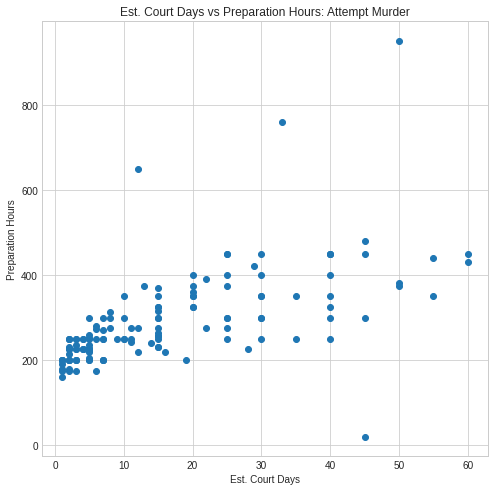

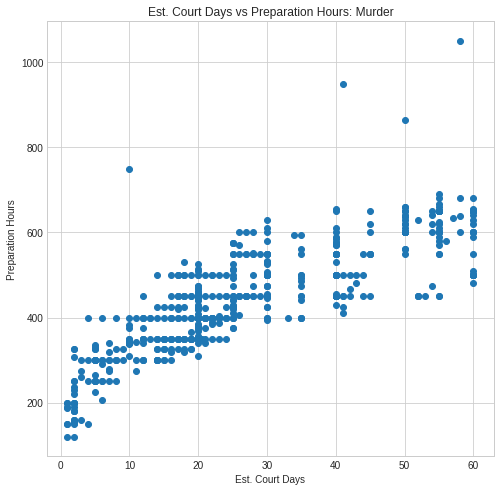

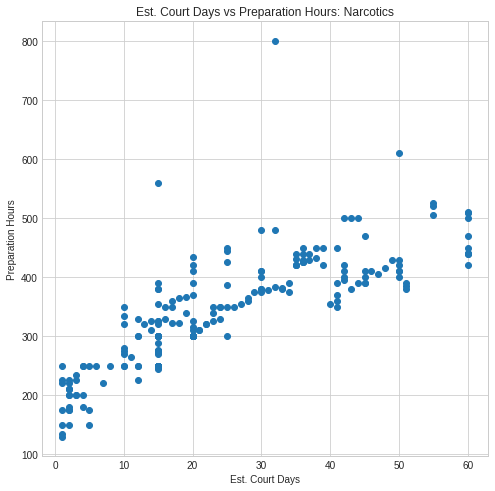

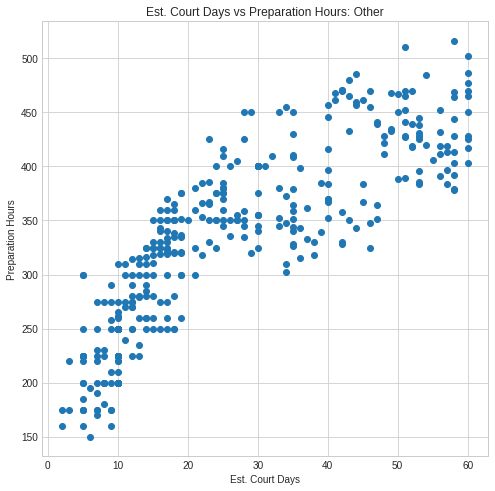

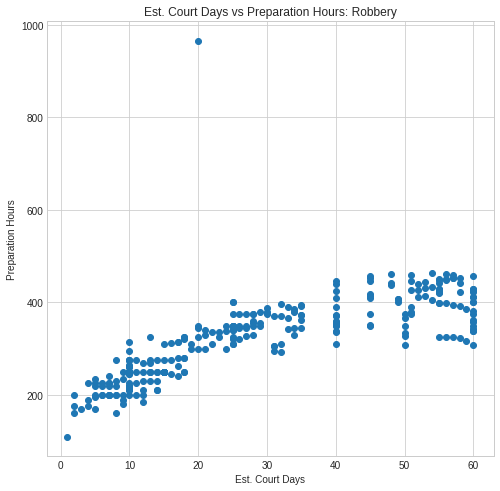

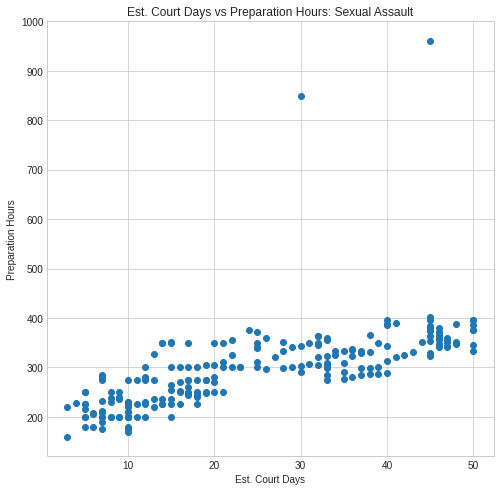

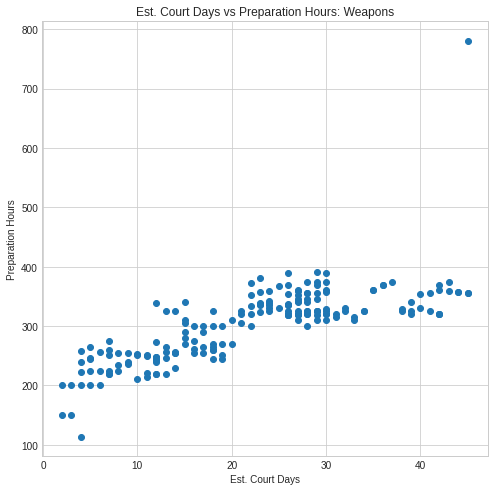

In [99]:
# plot seperate graph for each charge
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')
court_prep.head()

court_prep['court_d'].loc[court_prep.charge == 'Attempt Murder']
court_prep['charge'].loc[court_prep.charge == 'Attempt Murder']

# remove duplicates
chargelist = court_prep['charge']
chargelist = list(dict.fromkeys(chargelist))
#print(chargelist)

# plot seperate graph for each charge
for i in chargelist:
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    ax.scatter(court_prep['court_d'].loc[court_prep.charge == i],
               court_prep['prep_h'].loc[court_prep.charge == i])
    ax.set_title(f'Est. Court Days vs Preparation Hours: {i}')
    ax.set_xlabel('Est. Court Days')
    ax.set_ylabel('Preparation Hours')
    fig.savefig('individuals.jpg')
    


In [100]:
# descriptive statistics for Est. Court Days
import pandas as pd
import numpy as np

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')

court_prep['Index'] = range(1, len(court_prep) + 1)

court_prep_pv = court_prep.pivot_table(
    index = ['Index'],
    columns = 'charge',
    values = 'prep_h'
)

court_prep_pv = court_prep_pv.reset_index()
court_prep_pv = court_prep_pv[['Murder','Attempt Murder','Narcotics','Robbery','Sexual Assault','Weapons','Other']]
print("Descriptive Statistics for Est. Court Days:")
stat_court_d = court_prep_pv.describe()

#--------------------------------------------------------------------------------------
print("Observation: \n 1 - It seems that there is a signigicant difference between the population of various charges\n 2 - we need statistical test(s) to verify this observation"
     )

stat_court_d.head(20)


Descriptive Statistics for Est. Court Days:
Observation: 
 1 - It seems that there is a signigicant difference between the population of various charges
 2 - we need statistical test(s) to verify this observation


charge,Murder,Attempt Murder,Narcotics,Robbery,Sexual Assault,Weapons,Other
count,529.000000,140.000000,210.000000,290.00000,217.000000,190.000000,369.000000
mean,442.874291,289.796429,341.427762,323.74269,296.426636,303.738947,332.994201
std,129.231660,110.315259,96.594655,88.76789,84.600448,63.492932,84.024815
min,120.000000,20.000000,130.000000,110.00000,160.000000,113.900000,150.000000
25%,350.000000,225.000000,270.000000,250.00000,235.800000,255.250000,260.000000
50%,450.000000,250.000000,350.000000,330.00000,300.000000,320.000000,340.000000
75%,549.900000,350.000000,410.000000,381.75000,347.000000,339.837500,399.000000
max,1050.000000,950.000000,800.000000,965.00000,960.000000,780.000000,516.000000


In [101]:
import pandas as pd
import numpy as np
from scipy import stats

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')
court_prep.head()

# Pearson Corr value and test for the total charges and each charge

print("\nPearson Correlation Test: \n H_0:There is no correlation between Est. Court Days and Prep. Hours\n H_1: reject H_0 \n Alpha = 0.05")
pearson, p_value = stats.pearsonr(court_prep['court_d'],court_prep['prep_h'])

print("\nThe Test result:\n Pearson Correlation is:",round(pearson,2),"\n P_Value is: ", round(p_value,4))

print("Observation:\n with alpha = 0.05, H_0 is strongly rejected")

# individual Pearson Corr for each charge

# remove duplicates
chargelist = court_prep['charge']
chargelist = list(dict.fromkeys(chargelist))

print("\n\n\n")
print("Pearson Correlation Test for each charge: \n H_0:There is no correlation between Est. Court Days and Prep. Hours\n H_1: reject H_0 \n Alpha = 0.05")
print("\n")

for i in chargelist:
    a = court_prep['court_d'].loc[court_prep.charge == i]
    b = court_prep['prep_h'].loc[court_prep.charge == i]
    pearson,p_value = stats.pearsonr(a,b)
    print("Charge: ",i)
    print("The Test result:\n Pearson Correlation is:",round(pearson,2),"\n P_Value is: ", round(p_value,4))
    if p_value <= 0.05:
        print("Observation:\n with alpha = 0.05, H_0 is rejected\n")
    else:
        print("Observation: /n There is not enough evidence to reject H_0\n")

        
print("Observation:\n it seems that we have statistical support to use Est. Court Days to predict the number of preparation hours")


Pearson Correlation Test: 
 H_0:There is no correlation between Est. Court Days and Prep. Hours
 H_1: reject H_0 
 Alpha = 0.05

The Test result:
 Pearson Correlation is: 0.7 
 P_Value is:  0.0
Observation:
 with alpha = 0.05, H_0 is strongly rejected




Pearson Correlation Test for each charge: 
 H_0:There is no correlation between Est. Court Days and Prep. Hours
 H_1: reject H_0 
 Alpha = 0.05


Charge:  Attempt Murder
The Test result:
 Pearson Correlation is: 0.6 
 P_Value is:  0.0
Observation:
 with alpha = 0.05, H_0 is rejected

Charge:  Murder
The Test result:
 Pearson Correlation is: 0.83 
 P_Value is:  0.0
Observation:
 with alpha = 0.05, H_0 is rejected

Charge:  Narcotics
The Test result:
 Pearson Correlation is: 0.8 
 P_Value is:  0.0
Observation:
 with alpha = 0.05, H_0 is rejected

Charge:  Other
The Test result:
 Pearson Correlation is: 0.84 
 P_Value is:  0.0
Observation:
 with alpha = 0.05, H_0 is rejected

Charge:  Robbery
The Test result:
 Pearson Correlation is: 0.

In [102]:
# the Analysis of Variance Test and Independent Samples tests


import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')


df = pd.DataFrame(dict(x = court_prep['prep_h'], label = court_prep['charge']))
t_tests = pd.DataFrame(dict(x , label ))


df1 = df['x'].loc[df.label == 'Attempt Murder']
df2 = df['x'].loc[df.label == 'Murder']
df3 = df['x'].loc[df.label == 'Narcotics']
df4 = df['x'].loc[df.label == 'Robbery']
df5 = df['x'].loc[df.label == 'Sexual Assault']
df6 = df['x'].loc[df.label == 'Weapons']
df7 = df['x'].loc[df.label == 'Other']


stat, p_value = f_oneway(df1,df2,df3,df4,df5,df6,df7)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
    
#----------------------------------------------------------------------
# The Student's t-test

stat, p_value = ttest_ind(df1, df2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

NameError: name 'x' is not defined

In [103]:
# T-Test and F-Test for mu and sigma of various charges

import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import scipy.stats


#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')


# remove duplicates
chargelist = court_prep['charge']
chargelist = list(dict.fromkeys(chargelist))

#print(chargelist)

f_tests = {'charge':['Attempt Murder', 'Murder', 'Narcotics', 'Other', 'Robbery', 'Sexual Assault', 'Weapons'],
    'Attempt Murder':[1,2,3,4,5,6,7],
           'Murder':[1,2,3,4,5,6,7],
           'Narcotics':[1,2,3,4,5,6,7],
           'Other':[1,2,3,4,5,6,7],
           'Robbery':[1,2,3,4,5,6,7],
           'Sexual Assault':[1,2,3,4,5,6,7],
           'Weapons':[1,2,3,4,5,6,7]
          }

for charge_1,i in zip(chargelist, range(len(chargelist))):
    for charge_2,j in zip(chargelist, range(len(chargelist))):
#        print(i,j)
#        print(charge_1,charge_2)
#        print(pd.DataFrame(t_tests).iloc[i][j])
        stat, p_value = f_test(court_prep['prep_h'].loc[court_prep.charge == charge_1],
                                  court_prep['prep_h'].loc[court_prep.charge == charge_2]
                                 )
        f_tests[charge_1][j] = round(p_value,3)

f_tests = pd.DataFrame(f_tests)

print(f_tests)

#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------
# two-sample T-Test
#--------------------------------------------------------------------------------
#--------------------------------------------------------------------------------



t_tests = {'charge':['Attempt Murder', 'Murder', 'Narcotics', 'Other', 'Robbery', 'Sexual Assault', 'Weapons'],
    'Attempt Murder':[1,2,3,4,5,6,7],
           'Murder':[1,2,3,4,5,6,7],
           'Narcotics':[1,2,3,4,5,6,7],
           'Other':[1,2,3,4,5,6,7],
           'Robbery':[1,2,3,4,5,6,7],
           'Sexual Assault':[1,2,3,4,5,6,7],
           'Weapons':[1,2,3,4,5,6,7]
          }

for charge_1,i in zip(chargelist, range(len(chargelist))):
    for charge_2,j in zip(chargelist, range(len(chargelist))):
#        print(i,j)
#        print(charge_1,charge_2)
#        print(pd.DataFrame(t_tests).iloc[i][j])
        stat, p_value = ttest_ind(court_prep['prep_h'].loc[court_prep.charge == charge_1],
                                  court_prep['prep_h'].loc[court_prep.charge == charge_2]
                                 )
        t_tests[charge_1][j] = round(p_value,3)

t_tests = pd.DataFrame(t_tests)
print(t_tests)


print("\n\nObservation:\n based on the t_tests' and f_tests' p_values (two-tailed tests) if we assume alpha = 0.05 we can conclude: \n Charges are coming from four different populations:\n 1 - Murder,\n 2 - Robbery,\n 3 - Norcatics, Other, \n 4 - Attempt Murder, Sexual Assault, Weapons")
print("It means that we can group the charges in 4 category and continue the modeling process for each one of these four groups")
print("Note. Please note that this is the preliminary finding and further scrutiny is required to ensure the findings are accurate and reliable")
f_tests.head(7)
#t_tests.head(7)

           charge  Attempt Murder  Murder  Narcotics  Other  Robbery  \
0  Attempt Murder           0.500   0.012      0.959  1.000    0.999   
1          Murder           0.988   0.500      1.000  1.000    1.000   
2       Narcotics           0.041   0.000      0.500  0.990    0.908   
3           Other           0.000   0.000      0.010  0.500    0.160   
4         Robbery           0.001   0.000      0.092  0.840    0.500   
5  Sexual Assault           0.000   0.000      0.027  0.549    0.227   
6         Weapons           0.000   0.000      0.000  0.000    0.000   

   Sexual Assault  Weapons  
0           1.000      1.0  
1           1.000      1.0  
2           0.973      1.0  
3           0.451      1.0  
4           0.773      1.0  
5           0.500      1.0  
6           0.000      0.5  
           charge  Attempt Murder  Murder  Narcotics  Other  Robbery  \
0  Attempt Murder           1.000     0.0      0.000  0.000    0.001   
1          Murder           0.000     1.0      

,charge,Attempt Murder,Murder,Narcotics,Other,Robbery,Sexual Assault,Weapons
0,Attempt Murder,0.500,0.012,0.959,1.000,0.999,1.000,1.0
1,Murder,0.988,0.500,1.000,1.000,1.000,1.000,1.0
2,Narcotics,0.041,0.000,0.500,0.990,0.908,0.973,1.0
3,Other,0.000,0.000,0.010,0.500,0.160,0.451,1.0
4,Robbery,0.001,0.000,0.092,0.840,0.500,0.773,1.0
5,Sexual Assault,0.000,0.000,0.027,0.549,0.227,0.500,1.0
6,Weapons,0.000,0.000,0.000,0.000,0.000,0.000,0.5


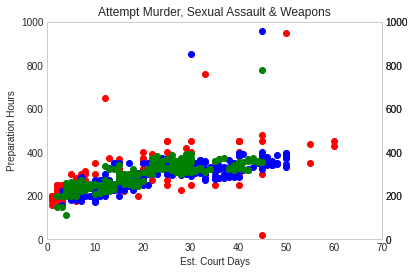

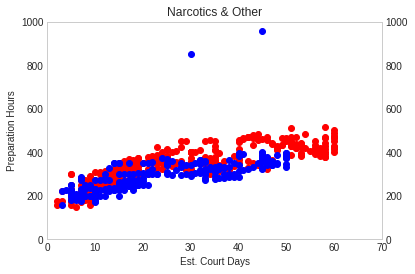

Observation: 
 1 - It seems that groups 3 and 4 are truly coming from similar populations 
 2 - We can see some outliers in different charges


In [104]:

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')
court_prep.head()

df = pd.DataFrame(dict(x = court_prep['court_d'],
               y = court_prep['prep_h'],
               label = court_prep['charge']))

df1 = df[['x','y','label']].loc[df.label == 'Attempt Murder']
df2 = df[['x','y','label']].loc[df.label == 'Murder']
df3 = df[['x','y','label']].loc[df.label == 'Narcotics']
df4 = df[['x','y','label']].loc[df.label == 'Robbery']
df5 = df[['x','y','label']].loc[df.label == 'Sexual Assault']
df6 = df[['x','y','label']].loc[df.label == 'Weapons']
df7 = df[['x','y','label']].loc[df.label == 'Other']


# graph group 4 together in one scatter plot

fig, ax = plt.subplots()
ax.scatter(df1['x'],df1['y'], c = 'red',label="Attempt Murder")
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)

ax2 = ax.twinx()
ax2.scatter(df5['x'],df5['y'],c = 'blue', label = 'Sexual Assault')
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)

ax3 = ax.twinx()
ax3.scatter(df6['x'],df6['y'],c = 'green', label = 'weapnos')
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)
ax.set_title('Attempt Murder, Sexual Assault & Weapons')
ax.set_xlabel('Est. Court Days')
ax.set_ylabel('Preparation Hours')
plt.show()

# graph group 3 together in one scatter plot

fig, ax = plt.subplots()
ax.scatter(df7['x'],df7['y'], c = 'red',label="Narcotics")
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)

ax2 = ax.twinx()
ax2.scatter(df5['x'],df5['y'],c = 'blue', label = 'Other')
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)

ax.set_title('Narcotics & Other')
ax.set_xlabel('Est. Court Days')
ax.set_ylabel('Preparation Hours')
plt.show()

print("Observation: \n 1 - It seems that groups 3 and 4 are truly coming from similar populations \n 2 - We can see some outliers in different charges")





['Attempt Murder', 'Murder', 'Narcotics', 'Other', 'Robbery', 'Sexual Assault', 'Weapons']
1
Attempt Murder


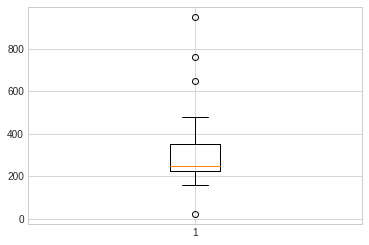

The following are the outliers in the boxplot:
       x      y           label
6   50.0  950.0  Attempt Murder
7   45.0   20.0  Attempt Murder
21  33.0  760.0  Attempt Murder
68  12.0  650.0  Attempt Murder
Murder


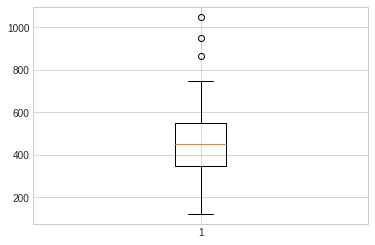

The following are the outliers in the boxplot:
        x       y   label
170  58.0  1050.0  Murder
232  50.0   865.0  Murder
254  41.0   950.0  Murder
Narcotics


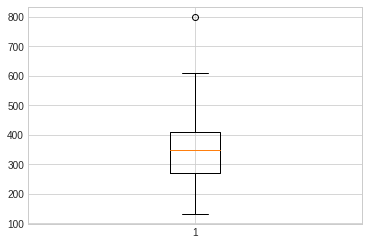

The following are the outliers in the boxplot:
        x      y      label
737  32.0  800.0  Narcotics
Other


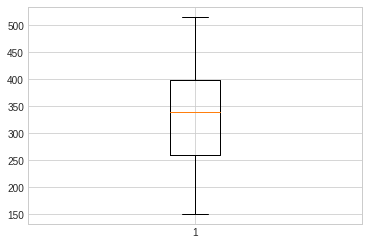

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Robbery


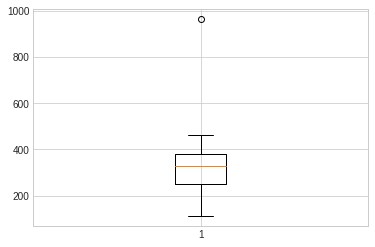

The following are the outliers in the boxplot:
         x      y    label
1419  20.0  965.0  Robbery
Sexual Assault


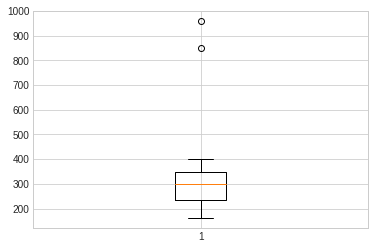

The following are the outliers in the boxplot:
         x      y           label
1572  45.0  960.0  Sexual Assault
1625  30.0  850.0  Sexual Assault
Weapons


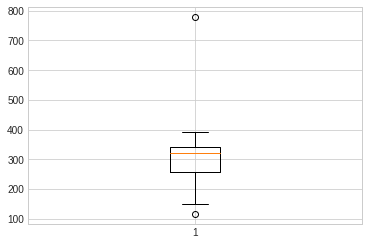

The following are the outliers in the boxplot:
         x      y    label
1757  45.0  780.0  Weapons
1936   4.0  113.9  Weapons
Total removed outliers by the end of this iteration:  13.0
To ensure there is no outliers another iteration is required
13.0
Attempt Murder


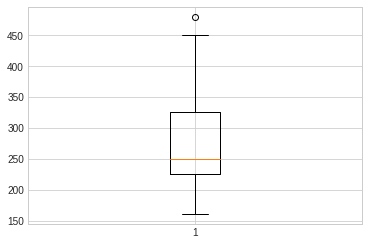

The following are the outliers in the boxplot:
       x      y           label
10  45.0  480.0  Attempt Murder
Murder


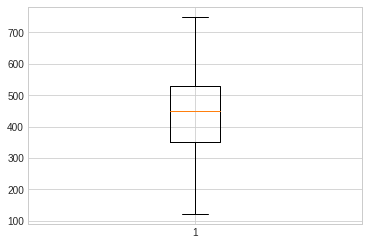

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Narcotics


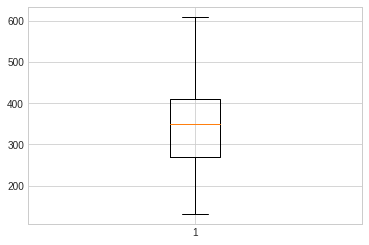

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Other


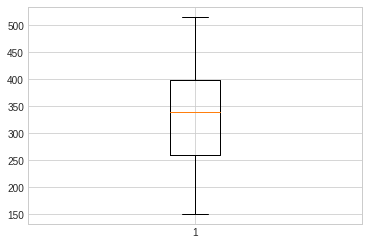

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Robbery


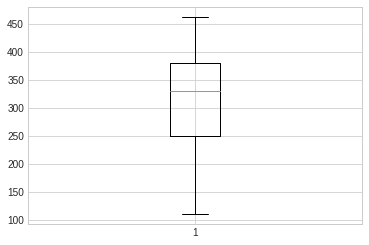

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Sexual Assault


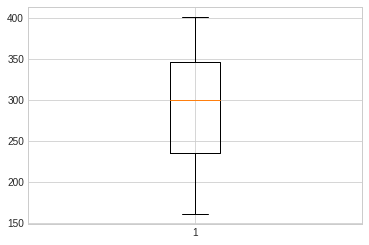

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Weapons


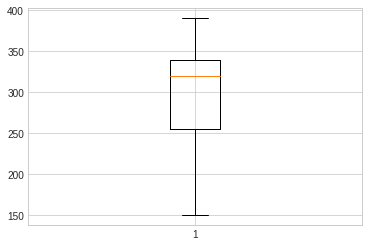

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Total removed outliers by the end of this iteration:  1.0
To ensure there is no outliers another iteration is required
1.0
Attempt Murder


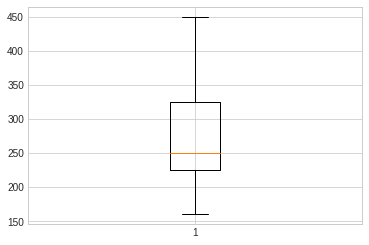

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Murder


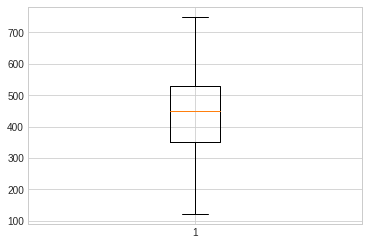

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Narcotics


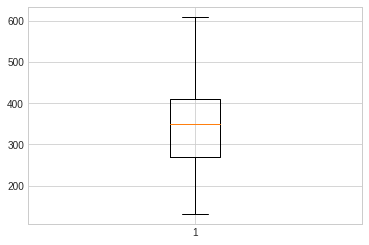

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Other


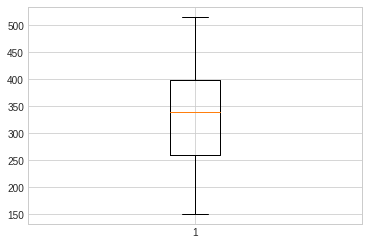

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Robbery


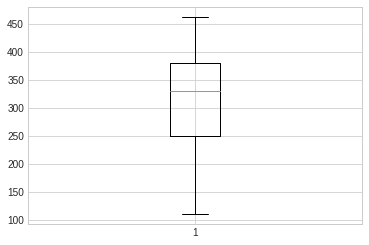

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Sexual Assault


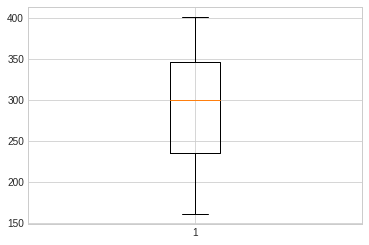

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Weapons


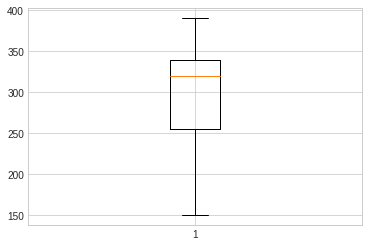

The following are the outliers in the boxplot:
Empty DataFrame
Columns: [x, y, label]
Index: []
Total removed outliers by the end of this iteration:  0.0
There is no outlier in the dataset


In [92]:
# to catch outliers in different charges
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

court_prep = pd.read_csv('https://raw.githubusercontent.com/bparsazadeh/INF1344H_Final_Project_Rep/main/court_prep_2.csv')
court_prep.head()

# remove duplicates
chargelist = court_prep['charge']
chargelist = list(dict.fromkeys(chargelist))

print(chargelist)

df = pd.DataFrame(dict(x = court_prep['court_d'],
               y = court_prep['prep_h'],
               label = court_prep['charge']))



# -----------------------------------------------------------------------
# outliers in diff charges based on IQR rule
# -----------------------------------------------------------------------


out_check = 1
while out_check != 0:
    print(out_check)
    out_check = 0
    for i in chargelist:
        print(i)
        df_plt = df[['x','y','label']].loc[df.label == i]
        plt.boxplot(df_plt['y'])
        plt.show()
        # finding the 1st quartile
        q1 = np.quantile(df_plt['y'], 0.25)

        # finding the 3rd quartile
        q3 = np.quantile(df_plt['y'], 0.75)
        med = np.median(df_plt['y'])

        # finding the iqr region
        iqr = q3-q1

        # finding upper and lower whiskers
        upper_bound = q3+(1.5*iqr)
        lower_bound = q1-(1.5*iqr)
        outliers = df_plt[(df_plt['y'] <= lower_bound) | (df_plt['y'] >= upper_bound)]
        out_check = out_check + outliers.size / 3
        print('The following are the outliers in the boxplot:\n{}'.format(outliers))
        df.drop(df_plt[(df_plt['y'] <= lower_bound) | (df_plt['y'] >= upper_bound)].index, inplace = True)
    print("Total removed outliers by the end of this iteration: ", out_check)
    if out_check > 0:
        print("To ensure there is no outliers another iteration is required")
    else:
        print("There is not any outlier in the dataset")
prep_court_cleaned = df    
df.to_csv('prep_court_no_outlier.csv')


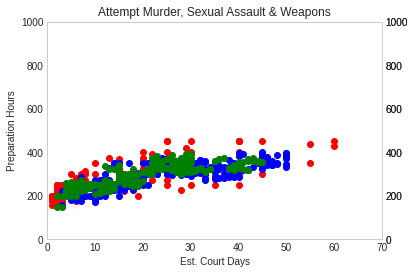

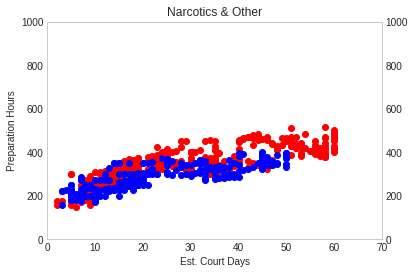

Observation: 
 all the outliers are removed. the data is ready for the modeling


In [96]:
# now we repeat the graphs to see the data without outliers:

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


df = prep_court_cleaned


df1 = df[['x','y','label']].loc[df.label == 'Attempt Murder']
df2 = df[['x','y','label']].loc[df.label == 'Murder']
df3 = df[['x','y','label']].loc[df.label == 'Narcotics']
df4 = df[['x','y','label']].loc[df.label == 'Robbery']
df5 = df[['x','y','label']].loc[df.label == 'Sexual Assault']
df6 = df[['x','y','label']].loc[df.label == 'Weapons']
df7 = df[['x','y','label']].loc[df.label == 'Other']


# graph group 4 together in one scatter plot
fig, ax = plt.subplots()

ax.scatter(df1['x'],df1['y'], c = 'red',label="Attempt Murder")
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)

ax2 = ax.twinx()
ax2.scatter(df5['x'],df5['y'],c = 'blue', label = 'Sexual Assault')
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)

ax3 = ax.twinx()
ax3.scatter(df6['x'],df6['y'],c = 'green', label = 'weapnos')
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)

ax.set_title('Attempt Murder, Sexual Assault & Weapons')
ax.set_xlabel('Est. Court Days')
ax.set_ylabel('Preparation Hours')
plt.show()




# graph group 3 together in one scatter plot

fig, ax = plt.subplots()
ax.scatter(df7['x'],df7['y'], c = 'red',label="Narcotics")
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)

ax2 = ax.twinx()
ax2.scatter(df5['x'],df5['y'],c = 'blue', label = 'Other')
plt.grid(False)
#plt.legend()
plt.xlim(0, 70)
plt.ylim(0, 1000)
ax.set_title('Narcotics & Other')
ax.set_xlabel('Est. Court Days')
ax.set_ylabel('Preparation Hours')
plt.show()

print("Observation: \n all the outliers are removed. the data is ready for the modeling")



